In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
file = '../publication_database.csv'

ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('olivine')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/mineral_ensembles/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['dk_2009_ol',
 'SEO2_ol',
 'xu_2000_ol[001]',
 'xu_2000_ol[010]',
 'xu_2000_ol[100]',
 'xu_2000_poly_ol',
 'dF_05_ol[100]',
 'dF_05_ol[010]',
 'dF_05_ol[001]',
 'SEO3_ol',
 'wang_06_ol',
 'ty_09_dry_ol',
 'ty_09_ol',
 'ty_12_ol',
 'gar_14_bell_ol[100]',
 'gar_14_bell_ol[010]',
 'gar_14_bell_ol[001]',
 'gar_14_withers_ol[100]',
 'gar_14_withers_ol[010]',
 'gar_14_withers_ol[001]',
 'y_16_ol[100]',
 'y_16_ol[010]',
 'y_16_ol[001]',
 'nv_17_ol[100]',
 'nv_17_ol[010]',
 'nv_17_ol[001]',
 'sun_19ol[100]',
 'sun_19ol[001]',
 'fei_20_ol[100]',
 'fei_20_ol[010]',
 'fei_20_ol[001]',
 'yang_12b_ol[100]',
 'yang_12b_ol[010]',
 'yang_12b_ol[001]',
 'isotropic_model:dF_05_ol[100]+dF_05_ol[010]+dF_05_ol[001]',
 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]',
 'isotropic_model:gar_14_bell_ol[100]+gar_14_bell_ol[010]+gar_14_bell_ol[001]',
 'isotropic_model:gar_14_withers_ol[100]+gar_14_withers_ol[010]+gar_14_withers_ol[001]',
 'isotropic_model:nv_17_ol[100]+nv_17_ol[010]+nv_17_ol[001]

# Exploring Pyrrhenious's Olivine Models Self Consistency

Here we look at the garnet models of:

 * Constable et al., 1992. The Electrical Conductivity of an Isotropic Olivine Mantle 
 
 * Xu et al., 2000. Pressure effect on electrical conductivity of mantle olivine 
 
 * DuFrane et al., 2005. Anisotropy of electrical conductivity in dry olivine
 
 * Constable S. 2006. SEO3: A new model of olivine electrical conductivity
 
 * Wang et al., 2006. The effect of water on the electrical conductivity of olivine
 
  * Wang et al., 2008. The electrical conductivity of upper-mantle rocks: water content in the upper mantle
 
 * Dai and Karato 2009. Dai Lidong, Karato Shun-ichiro.
 
 * Yoshino et al., 2009. The effect of water on the electrical conductivity of olivine aggregates and its implications for the electrical structure of the upper mantle 
 
 * Yoshino et al., 2012. Effect of temperature, pressure and iron content on the electrical conductivity of olivine and its high-pressure polymorphs
 
 * Yang X. 2012. Orientation-related electrical conductivity of hydrous olivine, clinopyroxene and plagioclase and implications for the structure of the lower continental crust and uppermost mantle
 
 * Gardes et al., 2014. Toward a unified hydrous olivine electrical conductivity law.
 
 * Yoshino et al.,  2016. Pressure dependence of electrical conductivity in forsterite
 
 * Novella et al., 2017. Hydrogen self-diffusion in single crystal olivine and electrical conductivity of the Earth’s mantle.
 
 * Sun et al., 2019. H-D Interdiffusion in Single-Crystal Olivine: Implications for Electrical Conductivity in the Upper Mantle.
 
 * Fei et al., 2020. The Effect of Water on Ionic Conductivity in Olivine.
 


# Dry Pure Isotropic Models Fitted to Entire Temperature Domain

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_91139/2099078701.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('nipy_spectral')(color_index),alpha=alpha)
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_91139/2099078701.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('nipy_spectral')(color_index),alpha=alpha)


Text(0.5, 0.98, 'Variation of dry conductivity models with Pressure')

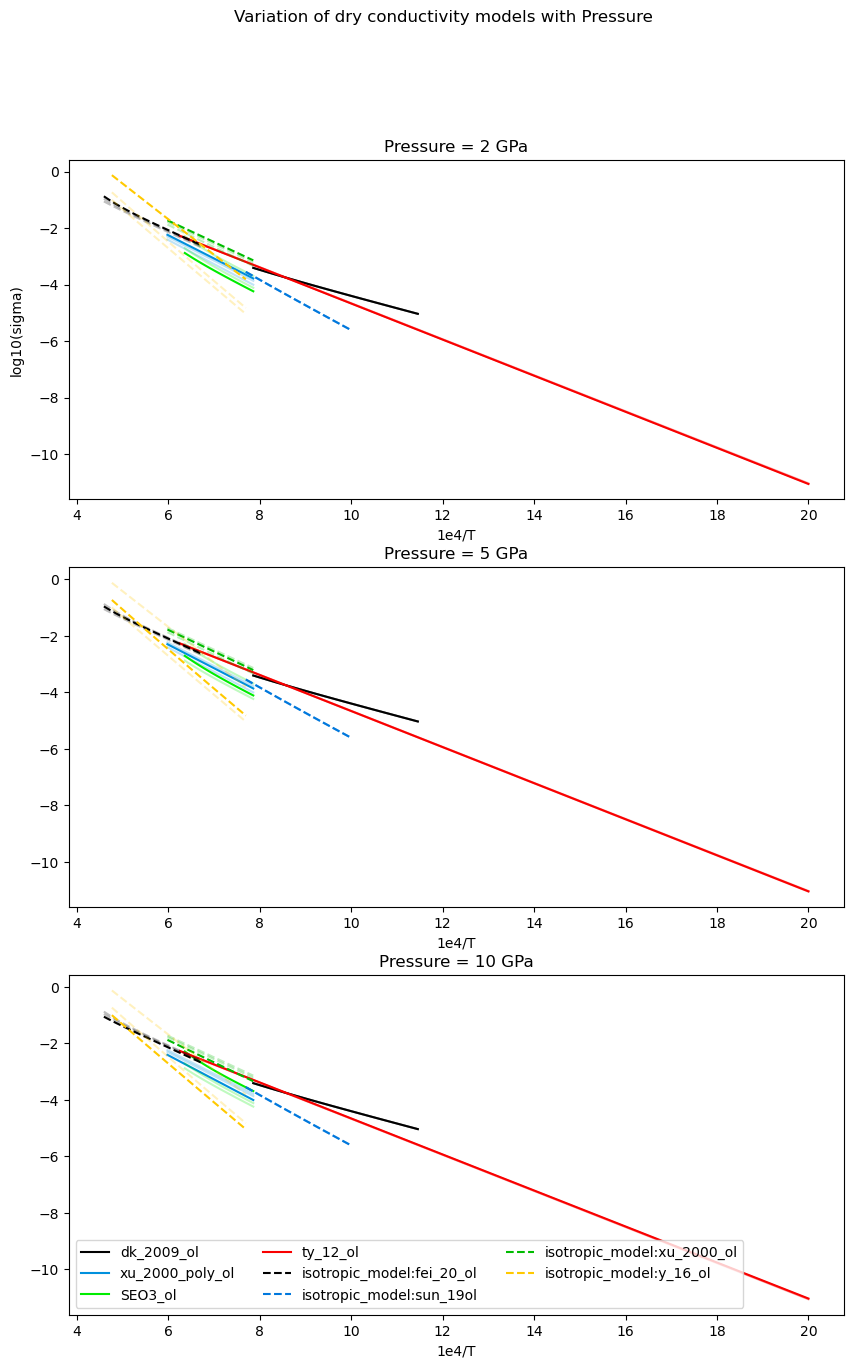

In [73]:
import matplotlib.cm as cm
P = 2 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)

dry_phases_isotropic = [
 'dk_2009_ol',
 'xu_2000_poly_ol',
 'SEO3_ol',
 'ty_12_ol',
 'isotropic_model:fei_20_ol[100]+fei_20_ol[010]+fei_20_ol[001]',
 'isotropic_model:sun_19ol[100]+sun_19ol[001]',
 'isotropic_model:xu_2000_ol[001]+xu_2000_ol[010]+xu_2000_ol[100]',
 'isotropic_model:y_16_ol[100]+y_16_ol[010]+y_16_ol[001]']

def plot_model(ax, model_name, model_color, pressure, alpha):
    ecmodel      = ecdatabase.get_model(model_name)
    ec_model_row = ecdatabase.get_model_properties(model_name)
    tmin = ec_model_row['temp_min']
    tmax = ec_model_row['temp_max']
    temperature_range = 1/np.linspace(1/tmax,1/tmin,num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,pressure)
    c = ecmodel.get_conductivity(T=temperature_range,P = pressure,X_fe=0.1,Cw=1,
                                                                   logfo2=logfo2)
    if 'isotropic' in model_name:
        label = model_name.split('[')[0]
        linestyle='--'
        color_index = (model_color - 4)/4
            
    else:
        color_index = model_color/3.5
        label = model_name
        linestyle='-'
        
    if 'sun' in model_name:
        c +=ecdatabase.get_model('ty_09_dry_ol').get_conductivity(T=temperature_range,P = pressure,X_fe=0.1,Cw=1,
                                                                   logfo2=logfo2)
    if alpha<1:
        ax.plot(1e4/temperature_range,np.log10(c),linestyle=linestyle,
                     color = 
                     cm.get_cmap('nipy_spectral')(color_index),alpha=alpha)
    else:
        ax.plot(1e4/temperature_range,np.log10(c),label=label,linestyle=linestyle,
                     color = 
                     cm.get_cmap('nipy_spectral')(color_index),alpha=alpha)
    ax.set_xlabel('1e4/T')
    
fig ,axs = plt.subplots(nrows=3,figsize=(10,15))
for model_color, model_name in enumerate(dry_phases_isotropic):
    for pi, pressure1 in enumerate([2,5,10]):
        axs[pi].set_title(f'Pressure = {pressure1} GPa')
        plot_model(axs[pi], model_name, model_color, pressure1, 1)
        for pj, pressure2 in enumerate([2,5,10]):
            if pressure1!=pressure2:
                plot_model(axs[pi], model_name, model_color,pressure2, 0.25)
axs[2].legend(ncols=3,loc='lower left')
axs[0].set_ylabel('log10(sigma)')
fig.suptitle('Variation of dry conductivity models with Pressure')

# Dry Isotropic Conductivity Models Variation with Iron

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_91139/1732248890.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = cm.get_cmap('nipy_spectral')(fi/4)


Text(0.5, 0.98, 'Variation of dry conductivity models with Iron and Pressure. 10wt ppm water')

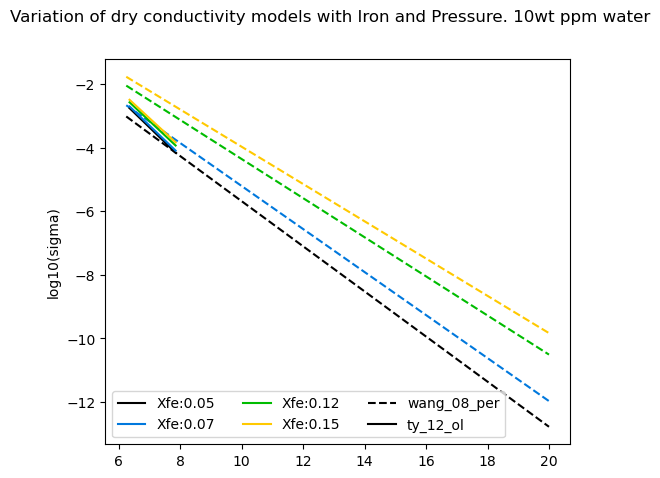

In [90]:
import matplotlib.cm as cm
P = 2 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)
dry_phases_isotropic = [
    'ty_12_ol','wang_08_per']
fig ,axs = plt.subplots(figsize=(6,5))
linestyles = ['--','-',':']

for model_color, model_name in enumerate(dry_phases_isotropic):
    ecmodel      = ecdatabase.get_model(model_name)
    ec_model_row = ecdatabase.get_model_properties(model_name)
    tmin = ec_model_row['temp_min']
    tmax = ec_model_row['temp_max']
    temperature_range = 1/np.linspace(1/tmax,1/tmin,num=100,dtype=float).ravel()
    for fi, iron in enumerate([0.05,0.07,0.12,0.15]):
        color = cm.get_cmap('nipy_spectral')(fi/4)
        c = ecmodel.get_conductivity(T=temperature_range,
                                        P=pressure,X_fe=iron,Cw=10.0)
        if model_color<1:
            axs.plot([],[],label=f'Xfe:{iron}',color=color)
        axs.plot(1e4/temperature_range,np.log10(c),color=color,linestyle=
                     linestyles[model_color])
axs.plot([],[],linestyle='--',label='wang_08_per',color='black')
axs.plot([],[],linestyle='-',label='ty_12_ol',color='black')
axs.legend(ncols=3,loc='lower left')
axs.set_ylabel('log10(sigma)')
fig.suptitle('Variation of dry conductivity models with Iron and Pressure. 10wt ppm water')